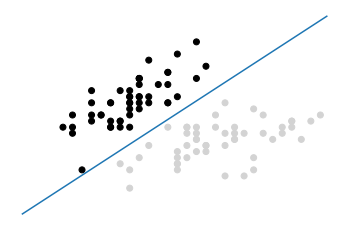

In [6]:
from sklearn.svm import SVC

#17.1 Training a Linear Classifier

from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
features = iris.data[:100, :2]
target = iris.target[:100]

scalar = StandardScaler()

features_std = scalar.fit_transform(features)

clf = LinearSVC(C=1.0)
# Train model
model = clf.fit(features_std, target)
from matplotlib import pyplot as plt
# Plot data points and color using their class
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_std[:,0], features_std[:,1], c=color)
# Create the hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (clf.intercept_[0]) / w[1]
# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

In [7]:
# 17.2 Handling Linearly Inseparable Classes Using Kernels

# Set randomization seed
np.random.seed(0)
# Generate two features
features = np.random.randn(200, 2)
# Use a XOR gate (you don't need to know what this is) to generate
# linearly inseparable classes
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)
# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Train the classifier
model = svc.fit(features, target)

In [8]:

# 17.3 Creating Predicted Probabilities

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create support vector classifier object
svc = SVC(kernel="linear", probability=True, random_state=0)
# Train classifier
model = svc.fit(features_standardized, target)
# Create new observation
new_observation = [[.4, .4, .4, .4]]
# View predicted probabilities
model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

In [9]:

# 17.4 Identifying Support Vectors

#Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create support vector classifier object
svc = SVC(kernel="linear", random_state=0)
# Train classifier
model = svc.fit(features_standardized, target)
# View support vectors
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

In [10]:

# 17.5 Handling Imbalanced Classes

#Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]
# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]
# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create support vector classifier
svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)
# Train classifier
model = svc.fit(features_standardized, target)